In [186]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import TimeSeriesSplit
from neuralprophet import NeuralProphet

In [187]:
data= pd.read_csv('../TSLA_Dataset.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-31,44.618000,45.136002,44.450001,44.481998,44.481998,11487500
1,2015-01-02,44.574001,44.650002,42.652000,43.862000,43.862000,23822000
2,2015-01-05,42.910000,43.299999,41.431999,42.018002,42.018002,26842500
3,2015-01-06,42.012001,42.840000,40.841999,42.256001,42.256001,31309500
4,2015-01-07,42.669998,42.956001,41.956001,42.189999,42.189999,14842000


In [188]:
data.drop('Adj Close', axis=1, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data.drop('Open', axis=1, inplace=True)
data.drop('High', axis=1, inplace=True)
data.drop('Low', axis=1, inplace=True)
data_new=data.rename(columns={'Date':'ds', 'Close':'y'})
data_new['ds'] = pd.DatetimeIndex(data_new['ds'])
print(data_new.dtypes)
data_new.to_csv('TSLA_Dataset'+'_preprocessed.csv',index=False)
data_new.describe()
data_new.head()

ds    datetime64[ns]
y            float64
dtype: object


,ds,y
0,2014-12-31,44.481998
1,2015-01-02,43.862000
2,2015-01-05,42.018002
3,2015-01-06,42.256001
4,2015-01-07,42.189999


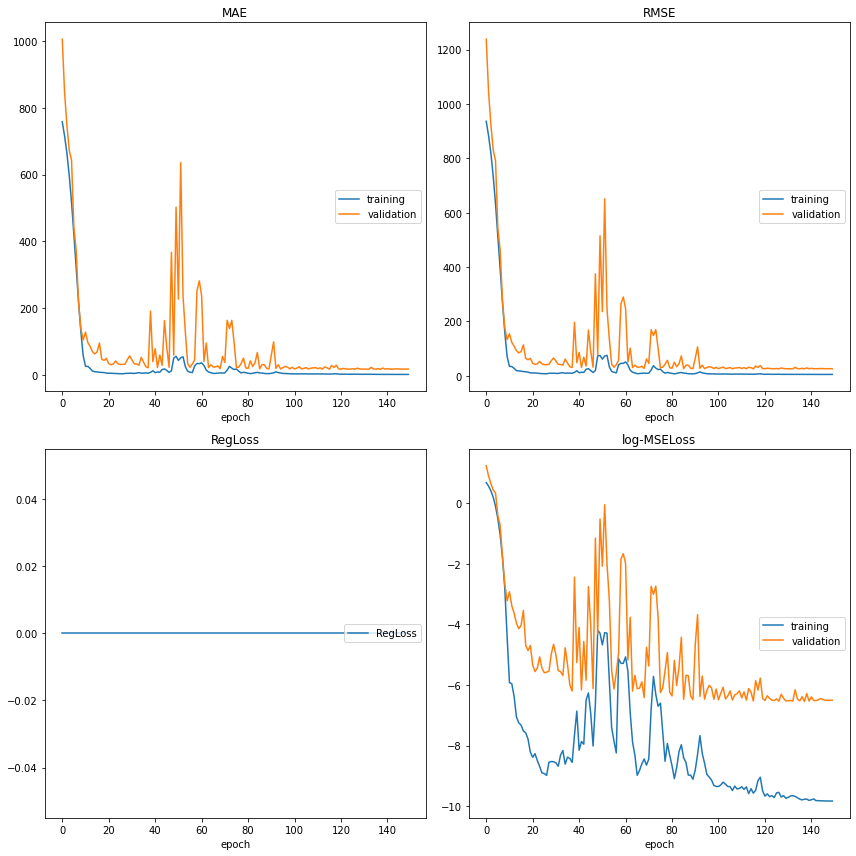

MAE
	training         	 (min:    2.096, max:  758.256, cur:    2.102)
	validation       	 (min:   17.707, max: 1005.166, cur:   18.039)
RMSE
	training         	 (min:    4.705, max:  936.484, cur:    4.808)
	validation       	 (min:   25.295, max: 1238.763, cur:   25.776)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-MSELoss
	training         	 (min:   -9.833, max:    0.686, cur:   -9.833)
	validation       	 (min:   -6.542, max:    1.240, cur:   -6.504)


,MSELoss,MAE,RMSE,RegLoss,MSELoss_val,MAE_val,RMSE_val
149,0.000054,2.101883,4.808015,0.0,0.001497,18.038725,25.775881


In [ ]:

model = NeuralProphet(
    growth="off",    # Determine trend types: 'linear', 'discontinuous', 'off'
    #changepoints=None,  # list of dates that may include change points (None->automatic)
    #n_changepoints=15,
   #changepoints_range=0.8,
   #trend_reg=0,
    #trend_reg_threshold=False,
    yearly_seasonality="auto",
    weekly_seasonality="auto",
    daily_seasonality="auto",
    #seasonality_mode="additive",
    #seasonality_reg=0,
    n_forecasts=1, #The model will forecast one step into the future
    n_lags=3*5, #Using 5 steps prediction window
    #ar_reg=1,
    batch_size=128,
    num_hidden_layers=0, #Number of hidden layers
    d_hidden=None,      # Number of neurons in each hidden layer of AR-Net
    #ar_sparsity=None,   # Sparcity in the AR coefficients
    learning_rate=0.2,
    epochs=150,
    loss_func="mse",
    normalize="minmax",   # Type of normalization ('minmax', 'standardize', 'soft', 'off')
    impute_missing=True
)
df = data_new.copy(deep=True)#Using a deep  Neural Network
df_train, df_test = model.split_df(df, freq='D', valid_p = 0.2)
metrics_train = model.fit(df_train, freq='D', validation_df=df_test, progress='plot-all')

metrics_train.tail(1)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.285% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 849 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 849 NaN values in column y were auto-imputed.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.821% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 558 historic forecasts, reduced to 543.
WARNING - (py.warnings._showwarnmsg) - C:\Users\HP\anaconda3\lib\site-packages\neuralprophet\forecaster.py:2060: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.821

Start of prediction for Nvidia Coorporation


Text(0.5, 1.0, 'Nvidia Coorporation Stock Price Prediction')

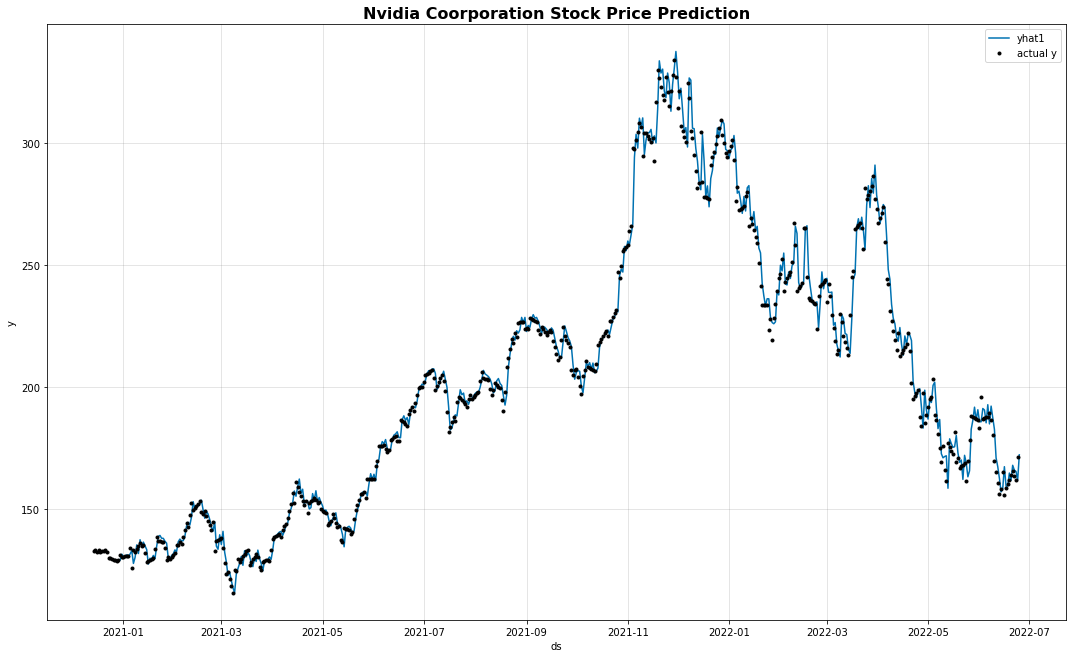

In [196]:
data= pd.read_csv('../NVDA_Dataset.csv')
print("Start of prediction for Nvidia Coorporation")
data.drop('Adj Close', axis=1, inplace=True)
data.drop('Volume', axis=1, inplace=True)
data.drop('Open', axis=1, inplace=True)
data.drop('High', axis=1, inplace=True)
data.drop('Low', axis=1, inplace=True)
data_new=data.rename(columns={'Date':'ds', 'Close':'y'})
data_new['ds'] = pd.DatetimeIndex(data_new['ds'])
dftest = data_new.copy(deep=True)#Using a deep  Neural Network
df_train, df_test = model.split_df(dftest, freq='D', valid_p = 0.2)
future = model.make_future_dataframe(df_test, periods=1, n_historic_predictions=len(df_test))
forecast = model.predict(future)
fig, ax = plt.subplots(figsize=(15, 9))
model.plot(forecast,ax=ax)
ax.set_title('Nvidia Coorporation Stock Price Prediction', fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Model Loss')

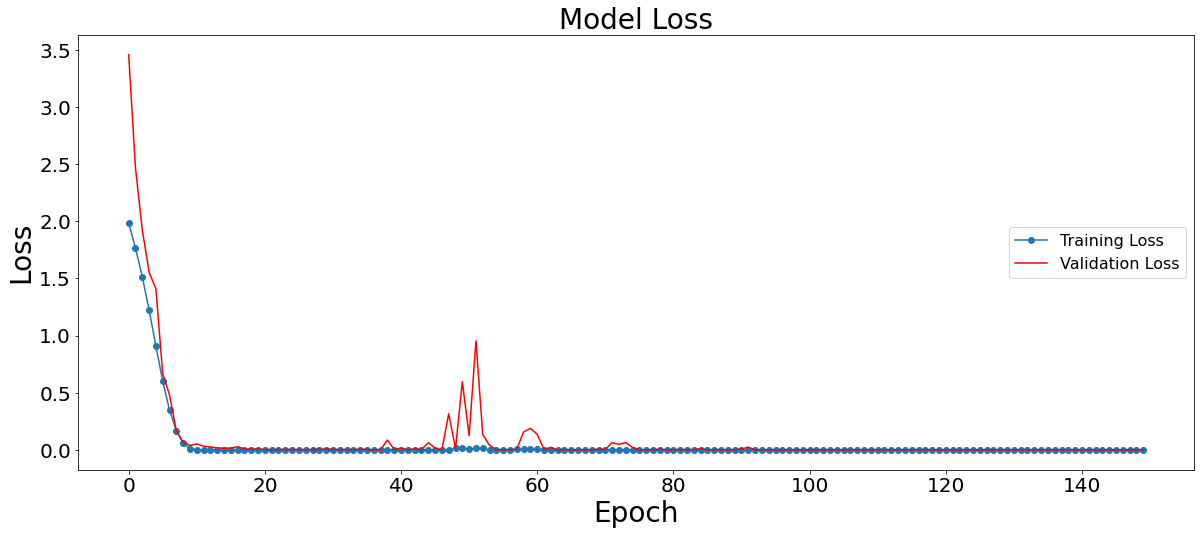

In [195]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics_train["MSELoss"], '-o', label="Training Loss")  
ax.plot(metrics_train["MSELoss_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss", fontsize=28)

In [197]:
#Compute the MAE error for the prediction
from sklearn.metrics import r2_score
APE=[]
forecast['y'] = forecast['y'].fillna(0)
forecast['yhat1'] = forecast['yhat1'].fillna(0)
y=forecast.iloc[15:558,1:2].values
yhat1=forecast.iloc[15:558,2:3].values

MAE=mean_absolute_error(y,yhat1)
MAPE=mean_absolute_percentage_error(y,yhat1)
RMSE=mean_squared_error(y,yhat1,squared=False)
r=r2_score(y, yhat1)
print("MAE value = ",MAE)
print("MAPE value = ",MAPE*100)
print("RMSE value = ",RMSE)
print("r2 score = ",r)

MAE value =  4.243408498291166
MAPE value =  2.0280340876890723
RMSE value =  6.239046647828038
r2 score =  0.9869747891726778
